# Weighted-residual method

Let us consider the equation

$$A u = f\quad \text{in } \Omega$$

For an approximation $u_N$ of $u$, the residual, $R_N$, is defined by

$$R_N \equiv Au_N - f$$

When the residual is made orthogonal to the subspace spanned by a base $\{\psi_k\}$, we have a weighted-residual method, i.e.,

$$\langle R_N, \psi_k\rangle =0 \quad k=1, 2, \cdots, N$$

In [1]:
from __future__ import division, print_function
import numpy as np
from sympy import *
from sympy.plotting import plot3d
from scipy.linalg import eigh
from scipy.special import jn_zeros as Jn_zeros, jn as Jn
import matplotlib.pyplot as plt

In [2]:
init_session()
%matplotlib inline
plt.style.use("seaborn-notebook")

IPython console for SymPy 1.2 (Python 3.6.6-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at http://docs.sympy.org/1.2/



##  Ritz method: Axisymmetric modes in a circular membrane

In [3]:
def u_fun(r, m):
    """ Trial function. """
    c = symbols('c0:%i' % m)
    w = (1 - r**2) *sum(c[k]*r**(2*k) for k in range (0, m))
    return w, c

In [4]:
r = symbols('r')
m = 7
u, coef = u_fun(r, m)

In [5]:
T_inte = u**2
U_inte = diff(u, r)**2

In [6]:
display(U_inte)
display(T_inte)

In [7]:
U = integrate(expand(r*U_inte), (r, 0, 1))
T = integrate(expand(r*T_inte), (r, 0, 1))

In [8]:
K = Matrix(m, m, lambda ii, jj: diff(U, coef[ii], coef[jj]))
K

⎡ 2    2/3   1/3   1/5   2/15  2/21  1/14⎤
⎢                                        ⎥
⎢                         26          19 ⎥
⎢2/3   2/3   7/15  1/3   ───   4/21  ─── ⎥
⎢                        105         126 ⎥
⎢                                        ⎥
⎢                   34    11             ⎥
⎢1/3   7/15  2/5   ───    ──   3/14  8/45⎥
⎢                  105    42             ⎥
⎢                                        ⎥
⎢             34          31    19       ⎥
⎢1/5   1/3   ───   2/7   ───    ──   2/11⎥
⎢            105         126    90       ⎥
⎢                                        ⎥
⎢       26    11    31          98    29 ⎥
⎢2/15  ───    ──   ───   2/9   ───   ─── ⎥
⎢      105    42   126         495   165 ⎥
⎢                                        ⎥
⎢                   19    98          71 ⎥
⎢2/21  4/21  3/14   ──   ───   2/11  ─── ⎥
⎢                   90   495         429 ⎥
⎢                                        ⎥
⎢       19                29    71       ⎥
⎢1/14  ─── 

In [9]:
M = Matrix(m, m, lambda ii, jj: diff(T, coef[ii], coef[jj]))
M

⎡ 1/3   1/12   1/30   1/60   1/105  1/168   1/252 ⎤
⎢                                                 ⎥
⎢1/12   1/30   1/60   1/105  1/168  1/252   1/360 ⎥
⎢                                                 ⎥
⎢1/30   1/60   1/105  1/168  1/252  1/360   1/495 ⎥
⎢                                                 ⎥
⎢1/60   1/105  1/168  1/252  1/360  1/495   1/660 ⎥
⎢                                                 ⎥
⎢1/105  1/168  1/252  1/360  1/495  1/660   1/858 ⎥
⎢                                                 ⎥
⎢1/168  1/252  1/360  1/495  1/660  1/858   1/1092⎥
⎢                                                 ⎥
⎣1/252  1/360  1/495  1/660  1/858  1/1092  1/1365⎦

In [10]:
Kn = np.array(K).astype(np.float64)
Mn = np.array(M).astype(np.float64)

In [11]:
vals, vecs = eigh(Kn, Mn, eigvals=(0, m-1))
np.sqrt(vals)

array([ 2.40482556,  5.52007811,  8.65373016, 11.79598495, 15.24615171,
       21.46269268, 41.26282741])

In [23]:
lam = Jn_zeros(0, m)

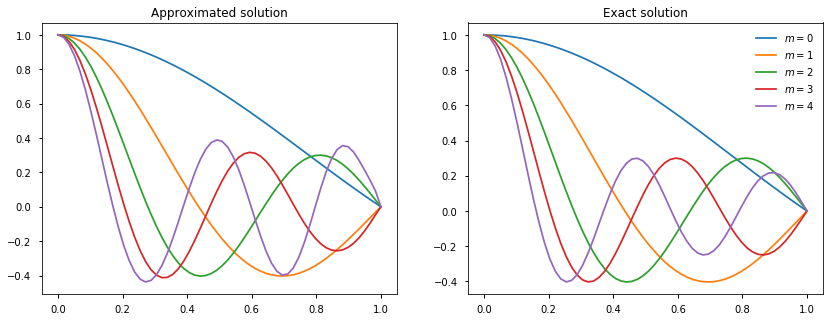

In [13]:
r_vec = np.linspace(0, 1, 60)
plt.figure(figsize=(14, 5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)
for num in range(5):
    u_num = lambdify((r), u.subs({coef[kk]: vecs[kk, num] for kk in range(m)}),
                     "numpy")
    ax1.plot(r_vec, u_num(r_vec)/u_num(0))
    ax1.set_title("Approximated solution")
    ax2.plot(r_vec, Jn(0, lam[num]*r_vec), label=r"$m=%i$"%num)
    ax2.set_title("Exact solution")
plt.legend(loc="best", framealpha=0);

## Bubnov-Galerkin method

The Bubnov-Galerkint methood is a generalization of the Ritz method. As in the Ritz method, it seeks an approximate solution as a linear combination of base functions

$$u_N = \sum_{i=1}^{N} c_i \phi_i\, .$$

In this case, the coefficients $c_i$ are determined from the condition that the residual $R_N$ is orthogonal to the basis functions $\phi_1, \phi_2, \cdots, \phi_N$:

$$\langle R_N, \phi_k\rangle =0\quad k=1, 2, \cdots, N \, .$$

If the operator is positive-definite then $A=T^*T$ and the problem can be rewritten identically to the Ritz method.

In [14]:
def u_fun(r, m):
    """ Trial function. """
    c = symbols('c0:%i' % m)
    w = (1 - r**2) *sum(c[k]*r**(2*k) for k in range (0, m))
    return w, c

In [15]:
r = symbols('r')
m = 7
u, coef = u_fun(r, m)

In [16]:
u

In [17]:
U = -integrate(diff(r*diff(u, r), r)*u, (r, 0, 1))
T = integrate(r*u**2, (r, 0, 1))

In [18]:
K = Matrix(m, m, lambda ii, jj: diff(U, coef[ii], coef[jj]))
K

⎡ 2    2/3   1/3   1/5   2/15  2/21  1/14⎤
⎢                                        ⎥
⎢                         26          19 ⎥
⎢2/3   2/3   7/15  1/3   ───   4/21  ─── ⎥
⎢                        105         126 ⎥
⎢                                        ⎥
⎢                   34    11             ⎥
⎢1/3   7/15  2/5   ───    ──   3/14  8/45⎥
⎢                  105    42             ⎥
⎢                                        ⎥
⎢             34          31    19       ⎥
⎢1/5   1/3   ───   2/7   ───    ──   2/11⎥
⎢            105         126    90       ⎥
⎢                                        ⎥
⎢       26    11    31          98    29 ⎥
⎢2/15  ───    ──   ───   2/9   ───   ─── ⎥
⎢      105    42   126         495   165 ⎥
⎢                                        ⎥
⎢                   19    98          71 ⎥
⎢2/21  4/21  3/14   ──   ───   2/11  ─── ⎥
⎢                   90   495         429 ⎥
⎢                                        ⎥
⎢       19                29    71       ⎥
⎢1/14  ─── 

In [19]:
M = Matrix(m, m, lambda ii, jj: diff(T, coef[ii], coef[jj]))
M

⎡ 1/3   1/12   1/30   1/60   1/105  1/168   1/252 ⎤
⎢                                                 ⎥
⎢1/12   1/30   1/60   1/105  1/168  1/252   1/360 ⎥
⎢                                                 ⎥
⎢1/30   1/60   1/105  1/168  1/252  1/360   1/495 ⎥
⎢                                                 ⎥
⎢1/60   1/105  1/168  1/252  1/360  1/495   1/660 ⎥
⎢                                                 ⎥
⎢1/105  1/168  1/252  1/360  1/495  1/660   1/858 ⎥
⎢                                                 ⎥
⎢1/168  1/252  1/360  1/495  1/660  1/858   1/1092⎥
⎢                                                 ⎥
⎣1/252  1/360  1/495  1/660  1/858  1/1092  1/1365⎦

In [20]:
Kn = np.array(K).astype(np.float64)
Mn = np.array(M).astype(np.float64)

In [21]:
vals, vecs = eigh(Kn, Mn, eigvals=(0, m-1))
np.sqrt(vals)

array([ 2.40482556,  5.52007811,  8.65373016, 11.79598495, 15.24615171,
       21.46269268, 41.26282741])

The following cell change the style of the notebook.

In [22]:
from IPython.core.display import HTML
def css_styling():
    styles = open('../styles/custom_barba.css', 'r').read()
    return HTML(styles)
css_styling()